In [1]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from src.config import get_interim_dir

from plots import psuedocontrolcomparisonplot, gene_sample_frequency_change_heatmap


In [3]:
results_df = pd.read_pickle((get_interim_dir() + "samplewise_augmented_outlier_results.pkl"))
psuedo_controls = pd.read_csv("artifacts/psuedo_controls.txt")["0"]
X_imputed = pkl.load(open("artifacts/imputed_data.pkl", "rb"))
aliases = X_imputed.keys()


/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


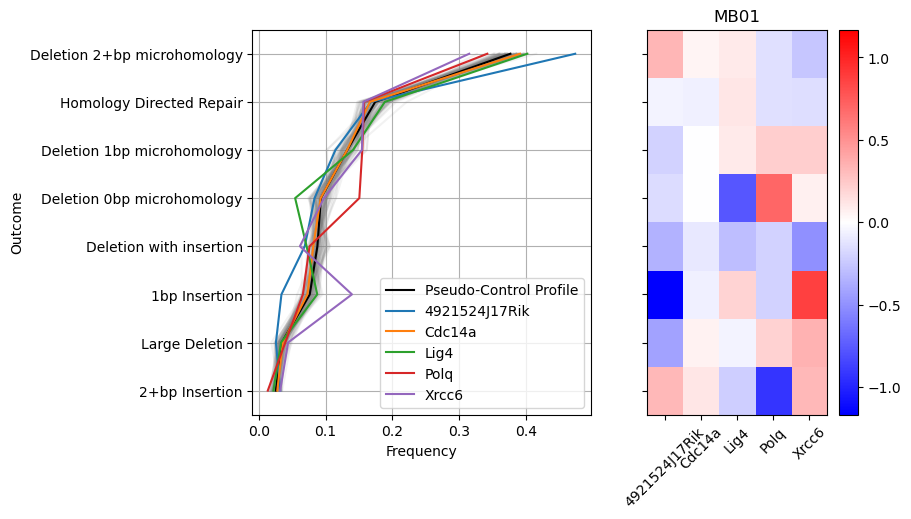

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


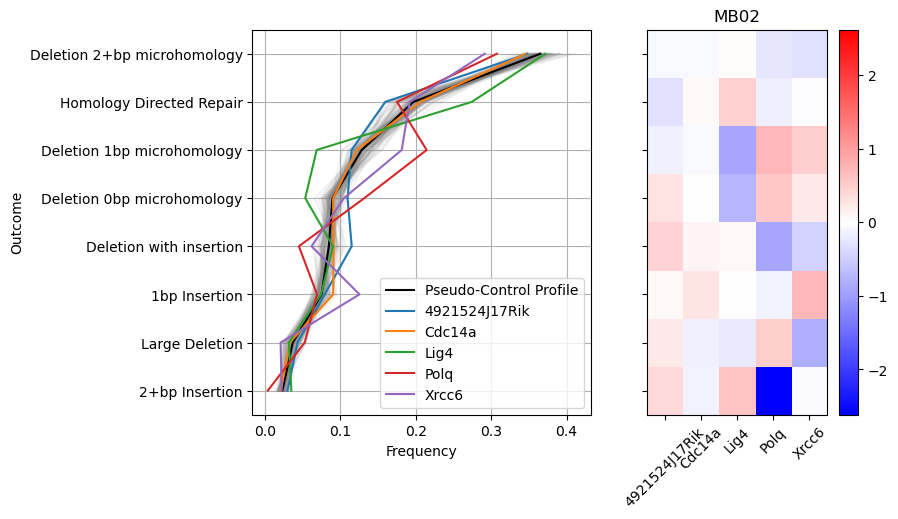

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


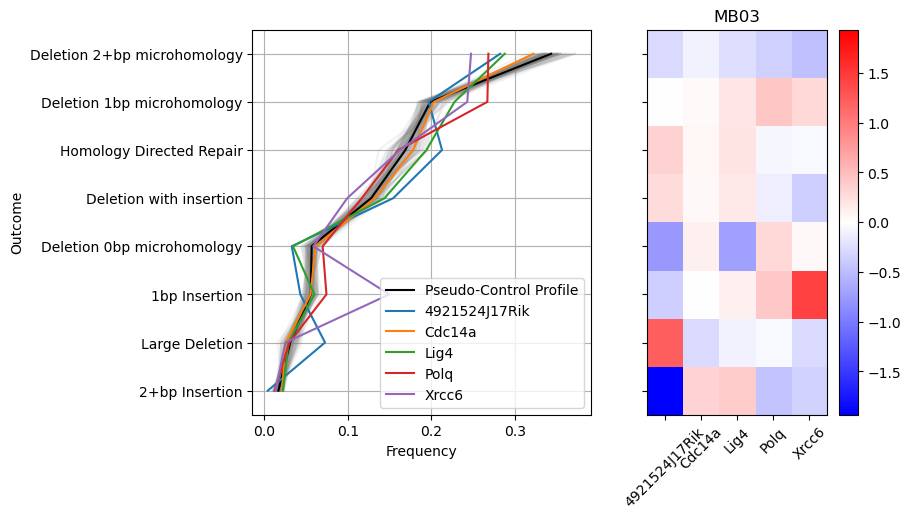

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


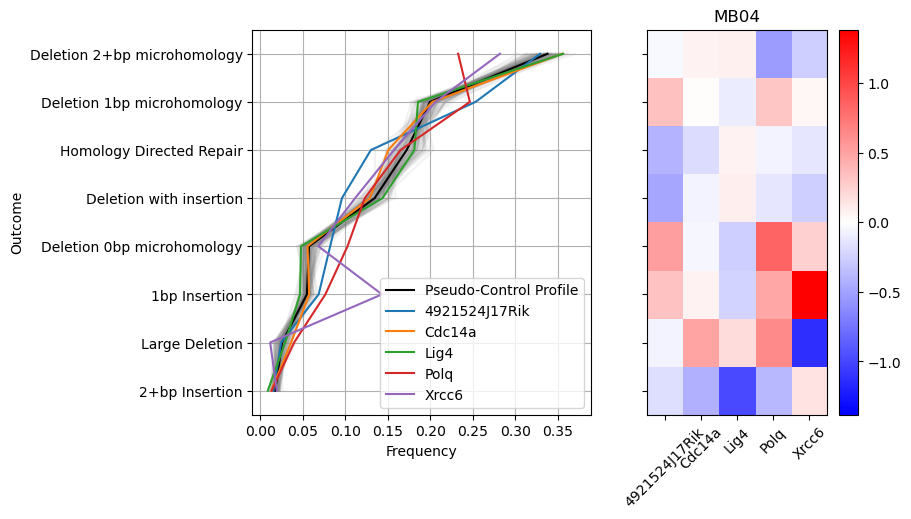

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


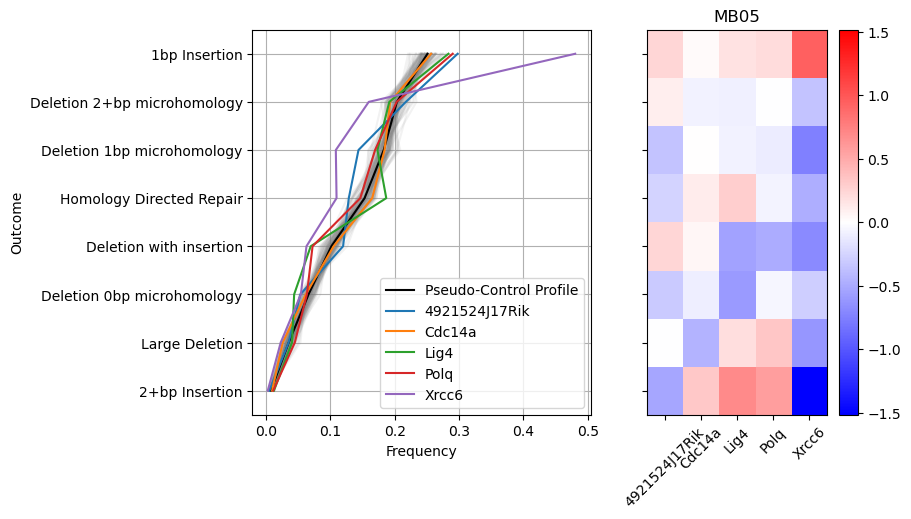

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


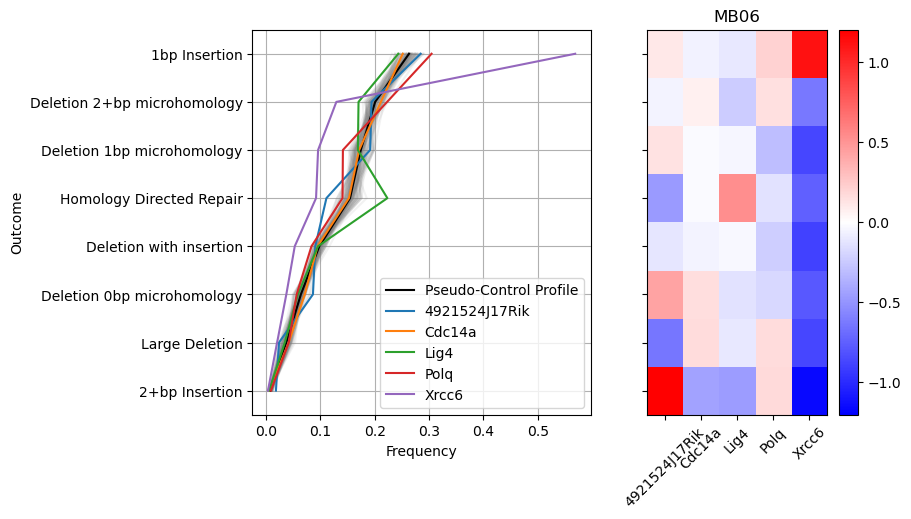

In [4]:
genes_to_investigate = ["4921524J17Rik", "Polq", "Lig4", "Xrcc6", psuedo_controls[0]]

for sample in aliases:
    df = X_imputed[sample]
    pseudo_control_df = X_imputed[sample].loc[psuedo_controls, :]

    psuedocontrolcomparisonplot(pseudo_control_df.dropna(axis=1), df.dropna(axis=1), compare_genes = np.intersect1d(df.dropna(axis=1).index.to_list(), genes_to_investigate), num_outcomes=40)
    plt.title(sample)
    plt.show()

4921524J17Rik


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


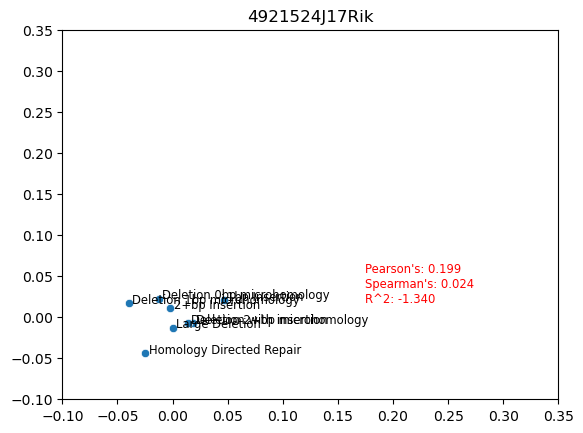

Polq


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


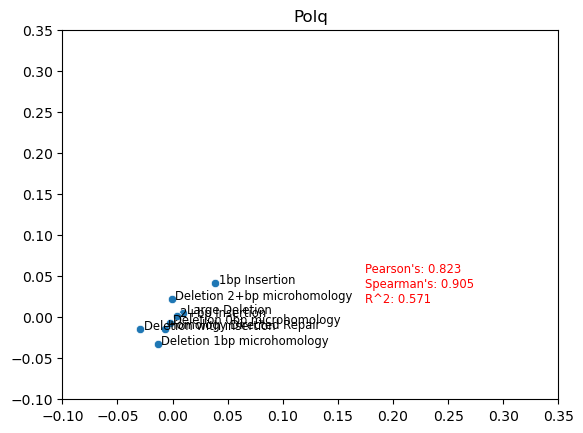

Lig4


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


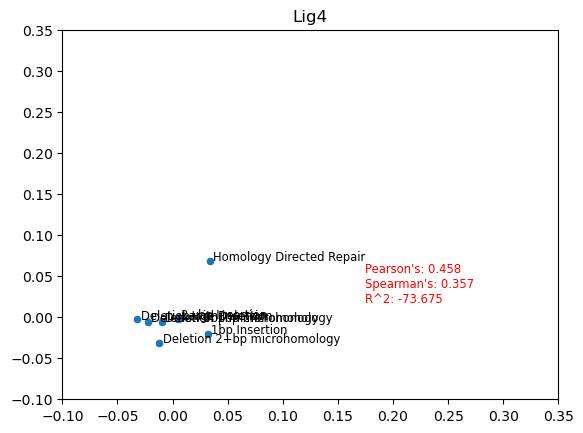

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Xrcc6


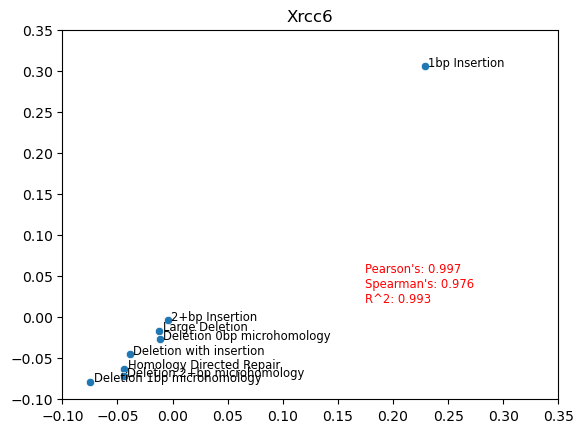

Cdc14a


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


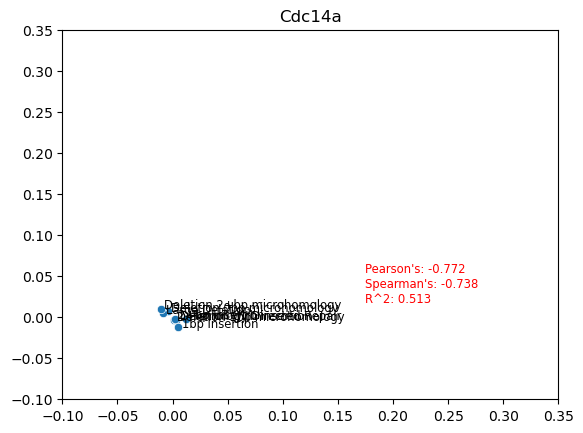

In [5]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score


def calculate_geometric_mean(df, samples):
    df = df.loc[samples, :]
    m = df.apply(stats.gmean)
    m = m / m.sum()
    return m

for gene in genes_to_investigate:
    print(gene)
    # a = X_imputed["MB05"].loc[gene] 
    # b = X_imputed["MB06"].loc[gene] 

    a = X_imputed["MB05"].loc[gene] - calculate_geometric_mean(X_imputed["MB05"], psuedo_controls)
    b = X_imputed["MB06"].loc[gene] - calculate_geometric_mean(X_imputed["MB06"], psuedo_controls)
    features = X_imputed["MB06"].columns.to_series()

    sns.scatterplot(a, b)


    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.003, point['y'], str(point['val']), size='small')

    label_point(a, b, features, plt.gca())  

    spearman_coef = stats.spearmanr(a, b)[0]
    pearson_coef = stats.pearsonr(a, b)[0]

    model = RANSACRegressor()
    model.fit(a.values.reshape(1, -1).T, b.values.reshape(1, -1).T)
    r2 = r2_score(model.predict(a.values.reshape(1, -1).T), b.values.reshape(1, -1).T)

    plt.text(0.175, 0.0175, "Pearson's: {:.3f}\nSpearman's: {:.3f}\nR^2: {:.3f}".format(pearson_coef, spearman_coef, r2), horizontalalignment='left', size='small', color='red')
    plt.ylim(-0.1, 0.35)
    plt.xlim(-0.1, 0.35)
    plt.title(gene)
    plt.show()


4921524J17Rik


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


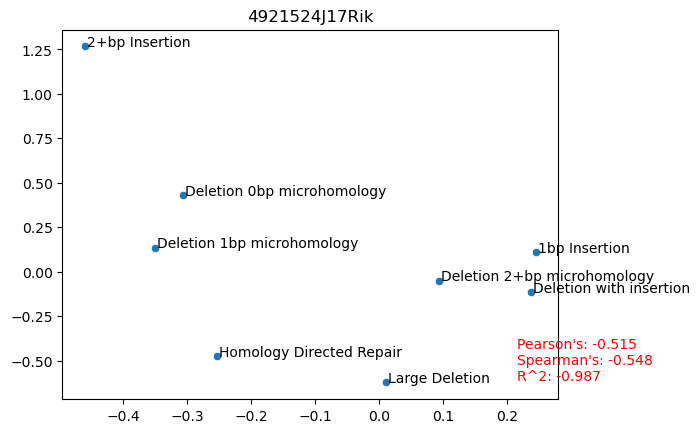

Polq


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


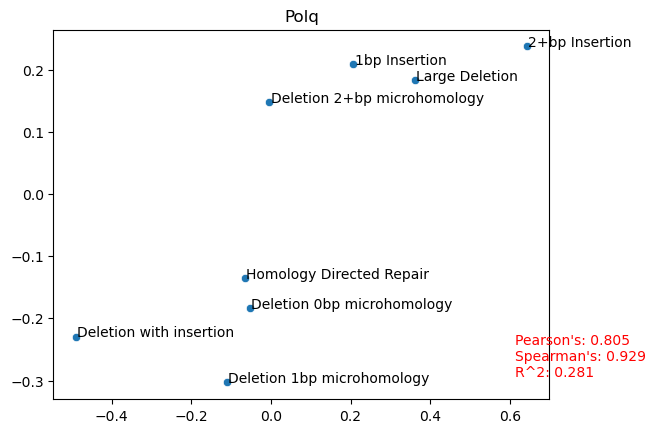

Lig4


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


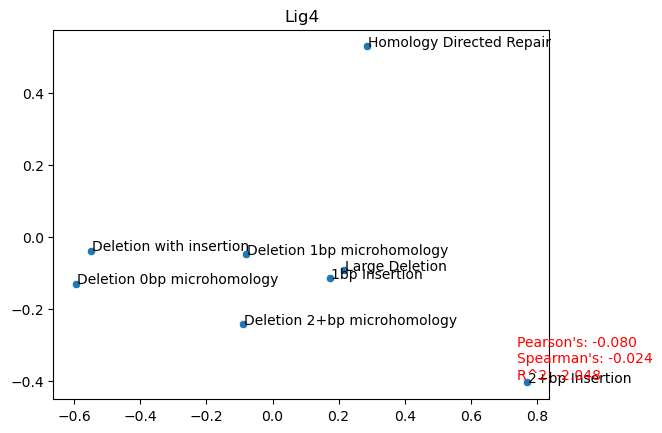

Xrcc6


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


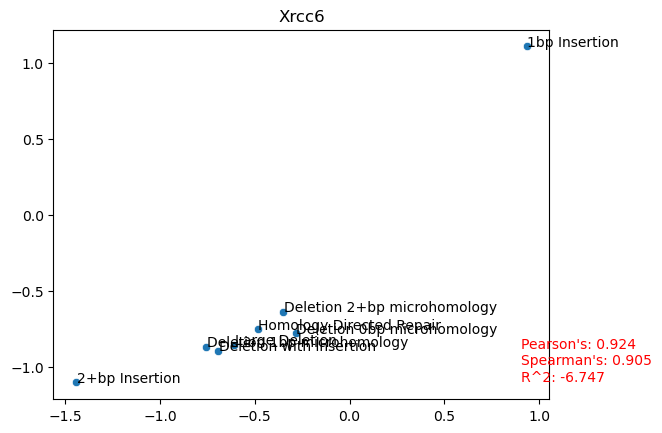

Cdc14a


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


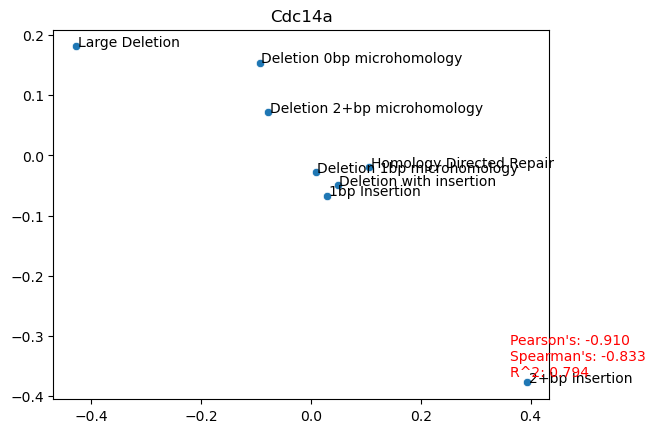

In [6]:
for gene in genes_to_investigate:
    print(gene)
    # a = X_imputed["MB05"].loc[gene] 
    # b = X_imputed["MB06"].loc[gene] 

    a = np.log2(X_imputed["MB05"].loc[gene]/calculate_geometric_mean(X_imputed["MB05"], psuedo_controls))
    b = np.log2(X_imputed["MB06"].loc[gene]/calculate_geometric_mean(X_imputed["MB06"], psuedo_controls))
    features = X_imputed["MB06"].columns.to_series()

    sns.scatterplot(a, b)


    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.003, point['y'], str(point['val']))

    label_point(a, b, features, plt.gca())  

    spearman_coef = stats.spearmanr(a, b)[0]
    pearson_coef = stats.pearsonr(a, b)[0]

    model = RANSACRegressor()
    model.fit(a.values.reshape(1, -1).T, b.values.reshape(1, -1).T)
    r2 = r2_score(model.predict(a.values.reshape(1, -1).T), b.values.reshape(1, -1).T)

    plt.text(max(a)-0.03, min(b)+0.01, "Pearson's: {:.3f}\nSpearman's: {:.3f}\nR^2: {:.3f}".format(pearson_coef, spearman_coef, r2), horizontalalignment='left', size='medium', color='red')
    plt.title(gene)
    plt.show()


/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


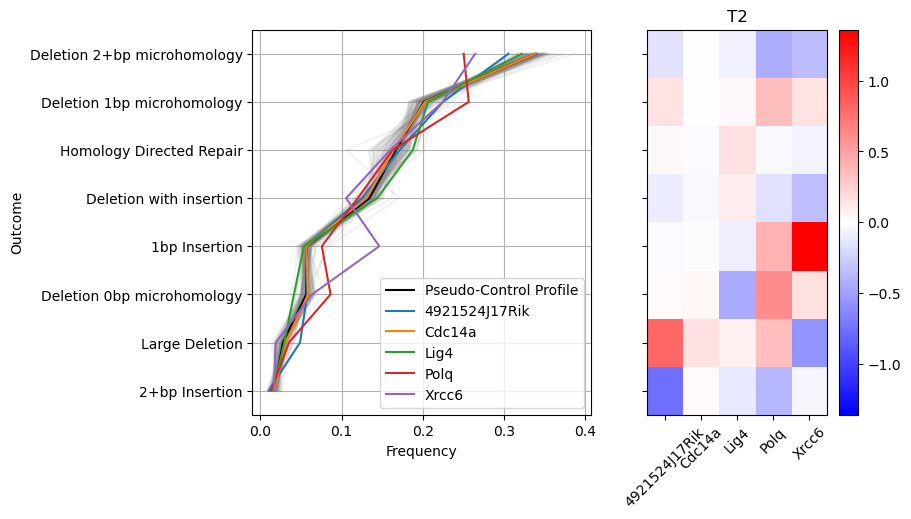

In [7]:
d = pd.concat([X_imputed["MB03"], X_imputed["MB04"]]).groupby("Gene").mean()

psuedocontrolcomparisonplot(d.dropna(axis=1), d.dropna(axis=1), compare_genes = np.intersect1d(d.dropna(axis=1).index.to_list(), genes_to_investigate), num_outcomes=40)
plt.title("T2")
plt.show()

/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)


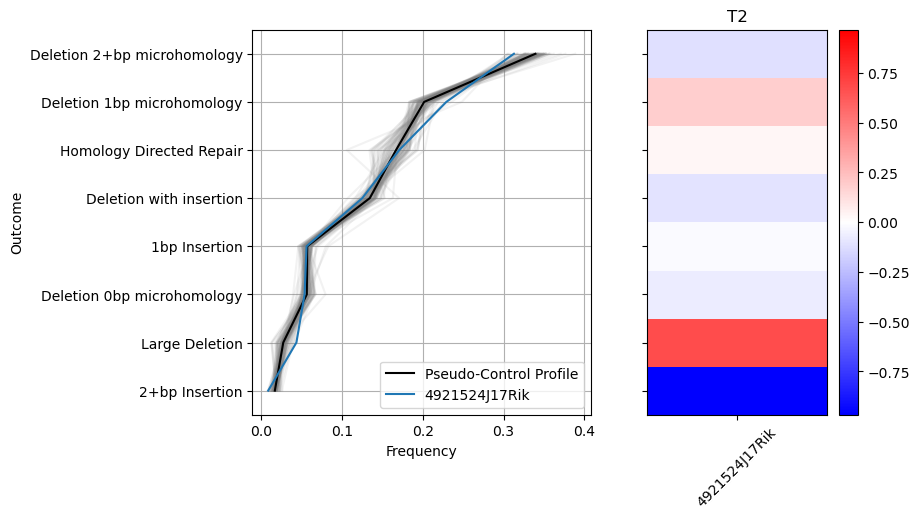

In [33]:
d = pd.concat([X_imputed["MB03"], X_imputed["MB04"]]).groupby("Gene").apply(stats.gmean)
d = pd.DataFrame(d.values.tolist(), index=d.index, columns=X_imputed["MB05"].columns)
d = d.div(d.sum(axis=1), axis=0)

psuedocontrolcomparisonplot(d.dropna(axis=1), d.dropna(axis=1), compare_genes = np.intersect1d(d.dropna(axis=1).index.to_list(), genes_to_investigate[:1]), num_outcomes=40)
plt.title("T2")
plt.show()

4921524J17Rik


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


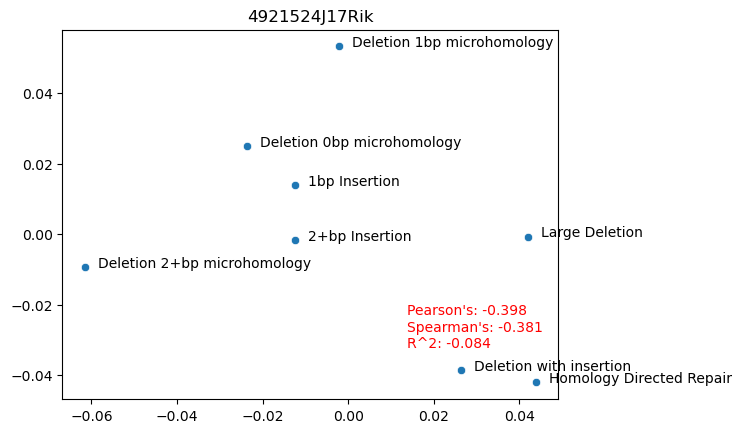

In [9]:
for gene in genes_to_investigate[:1]:
    print(gene)

    a = X_imputed["MB03"].loc[gene] - calculate_geometric_mean(X_imputed["MB03"], psuedo_controls)
    b = X_imputed["MB04"].loc[gene] - calculate_geometric_mean(X_imputed["MB04"], psuedo_controls)
    features = X_imputed["MB04"].columns.to_series()

    sns.scatterplot(a, b)


    def label_point(x, y, val, ax):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            ax.text(point['x']+.003, point['y'], str(point['val']))

    label_point(a, b, features, plt.gca())  

    spearman_coef = stats.spearmanr(a, b)[0]
    pearson_coef = stats.pearsonr(a, b)[0]

    model = RANSACRegressor()
    model.fit(a.values.reshape(1, -1).T, b.values.reshape(1, -1).T)
    r2 = r2_score(model.predict(a.values.reshape(1, -1).T), b.values.reshape(1, -1).T)

    plt.text(max(a)-0.03, min(b)+0.01, "Pearson's: {:.3f}\nSpearman's: {:.3f}\nR^2: {:.3f}".format(pearson_coef, spearman_coef, r2), horizontalalignment='left', size='medium', color='red')
    plt.title(gene)
    plt.show()


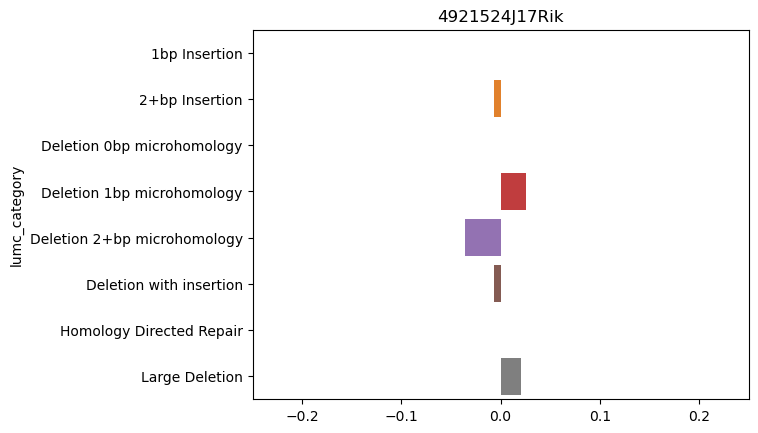

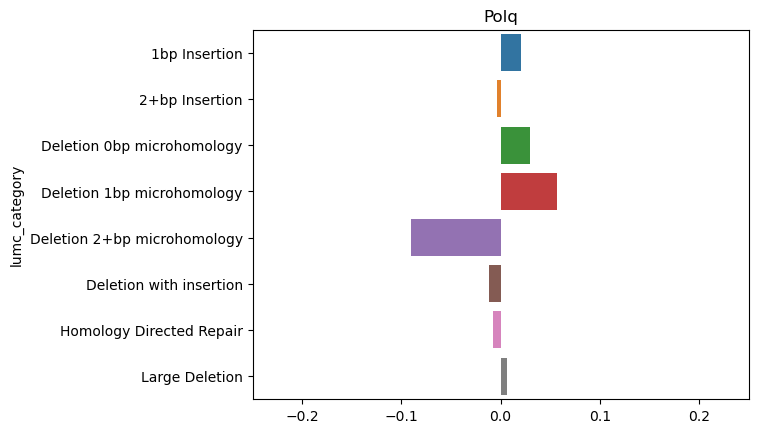

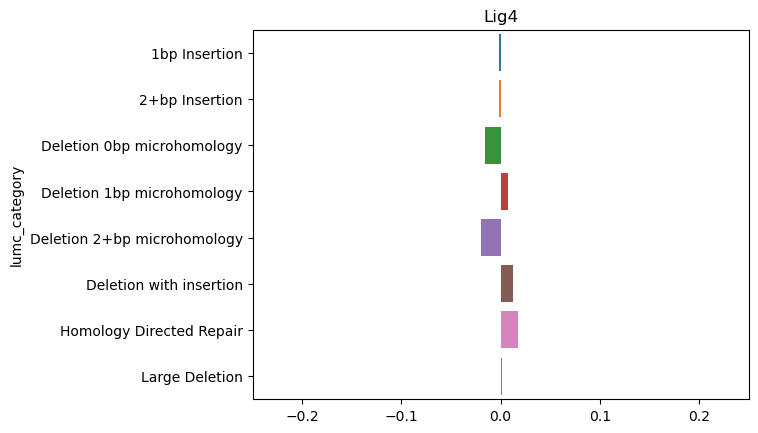

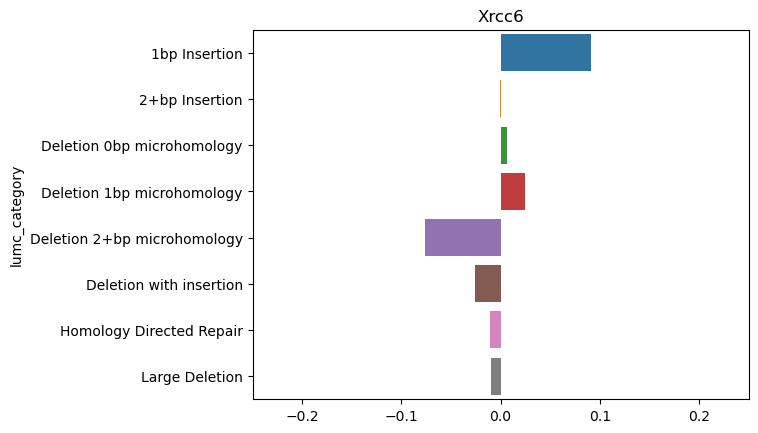

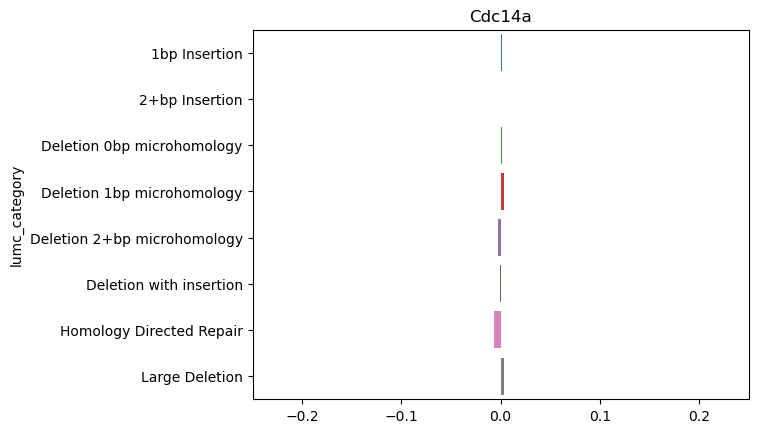

In [14]:
for gene in genes_to_investigate:
    # a = X_imputed["MB03"].loc[gene] 
    # b = X_imputed["MB04"].loc[gene] 

    sorting = X_imputed["MB03"].mean().argsort()[::-1]

    a = X_imputed["MB03"].loc[gene] - calculate_geometric_mean(X_imputed["MB03"], psuedo_controls)[sorting]
    b = X_imputed["MB04"].loc[gene] - calculate_geometric_mean(X_imputed["MB04"], psuedo_controls)[sorting]
    features = X_imputed["MB04"].columns.to_series()[sorting]

    mean_diff = ((a + b )/ 2)

    sns.barplot(x = mean_diff, y= mean_diff.index)

    plt.xlim(-0.25,0.25)
    plt.title(gene)
    plt.show()


In [32]:
pd.concat([a, b], axis=1).T

lumc_category,1bp Insertion,2+bp Insertion,Deletion 0bp microhomology,Deletion 1bp microhomology,Deletion 2+bp microhomology,Deletion with insertion,Homology Directed Repair,Large Deletion
0,-0.000164,0.004737,0.004762,0.004101,-0.021765,0.004313,0.009079,-0.005063
1,0.002733,-0.004182,-0.001496,0.002378,0.016732,-0.005707,-0.021494,0.011035


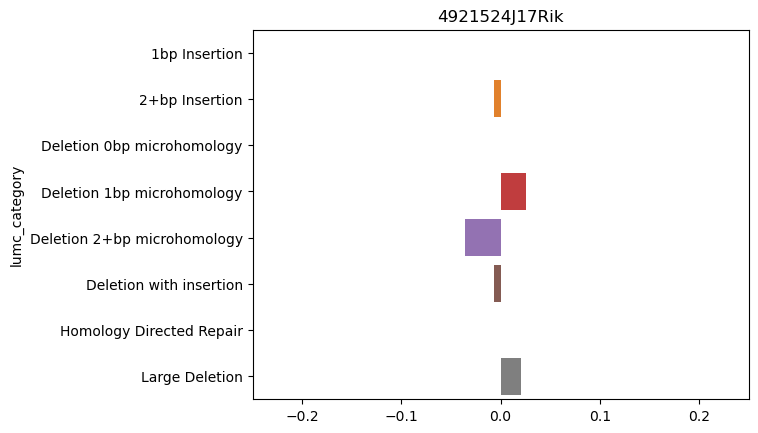

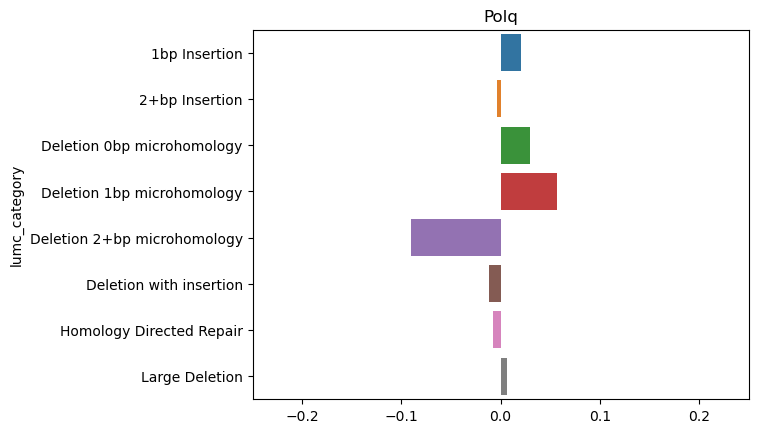

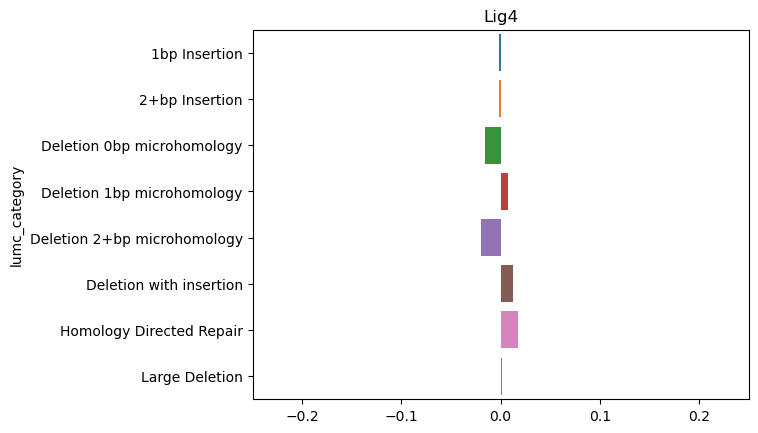

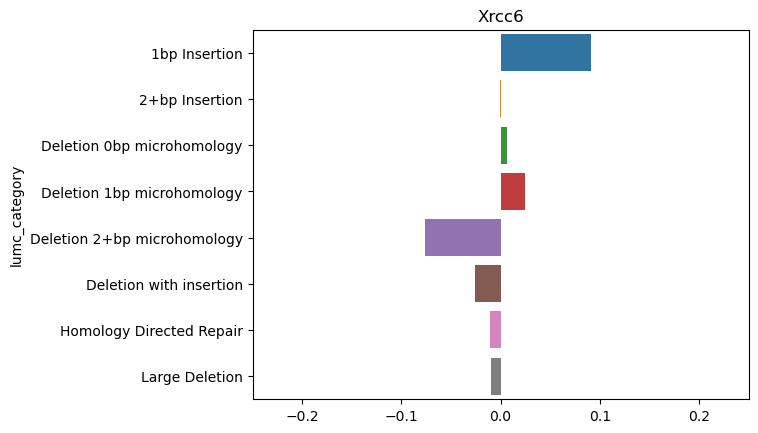

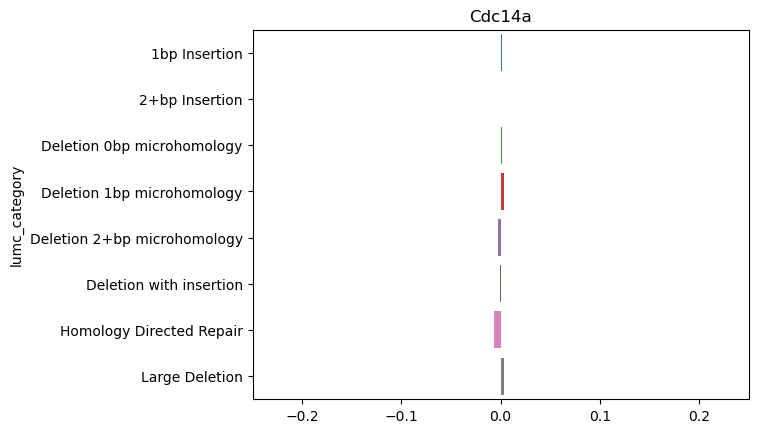

In [26]:
for gene in genes_to_investigate:
    # a = X_imputed["MB03"].loc[gene] 
    # b = X_imputed["MB04"].loc[gene] 

    sorting = X_imputed["MB03"].mean().argsort()[::-1]

    a = X_imputed["MB03"].loc[gene] - calculate_geometric_mean(X_imputed["MB03"], psuedo_controls)[sorting]
    b = X_imputed["MB04"].loc[gene] - calculate_geometric_mean(X_imputed["MB04"], psuedo_controls)[sorting]
    features = X_imputed["MB04"].columns.to_series()[sorting]

    mean_diff = ((a + b )/ 2)

    sns.barplot(x = mean_diff, y= mean_diff.index)

    plt.xlim(-0.25,0.25)
    plt.title(gene)
    plt.show()

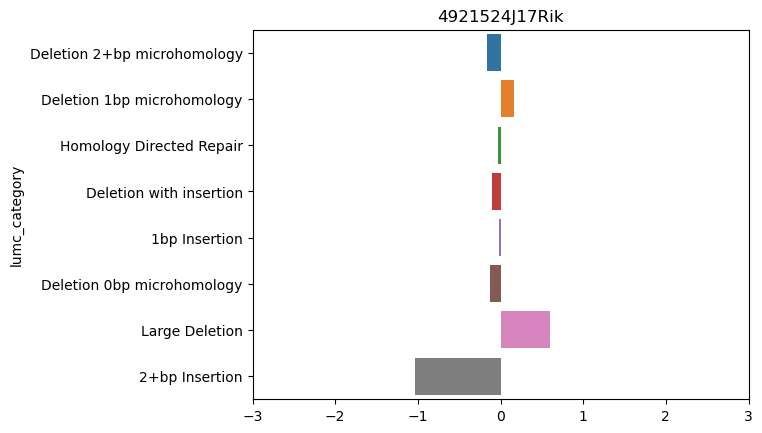

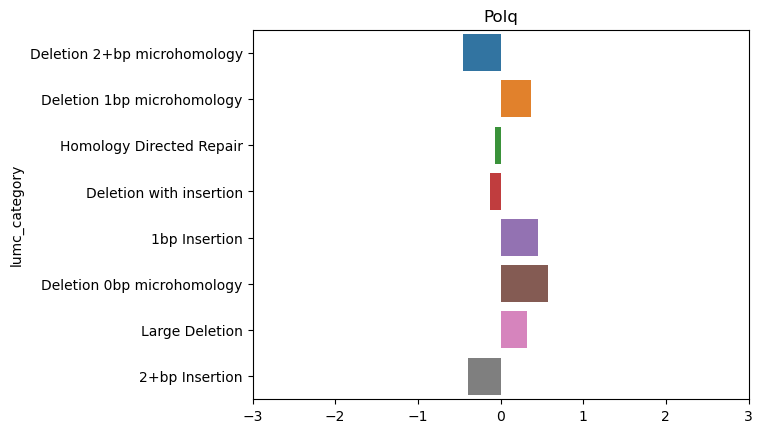

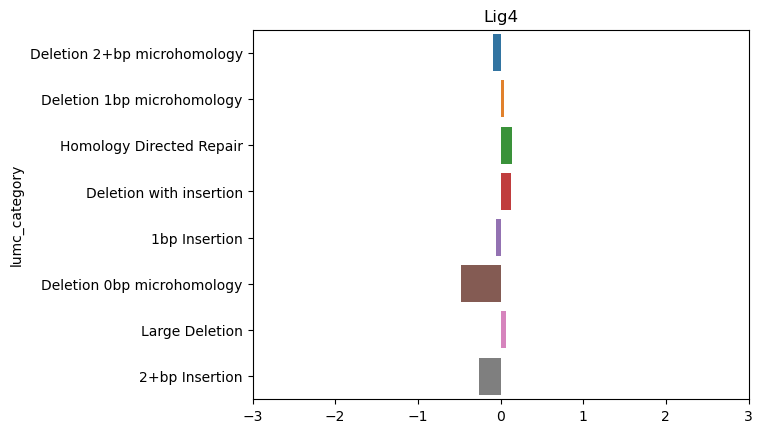

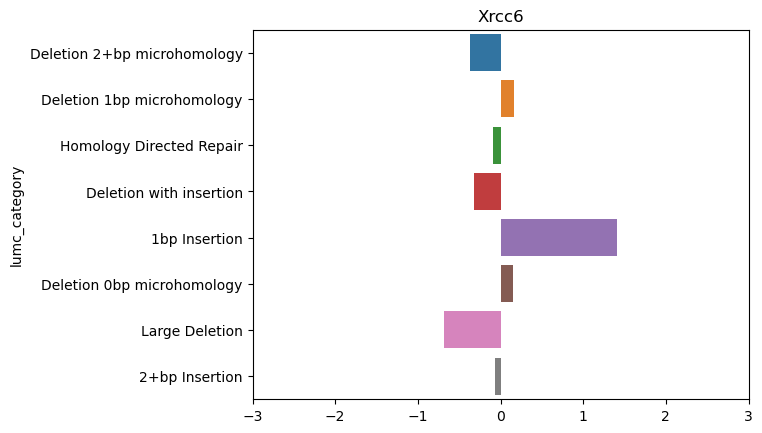

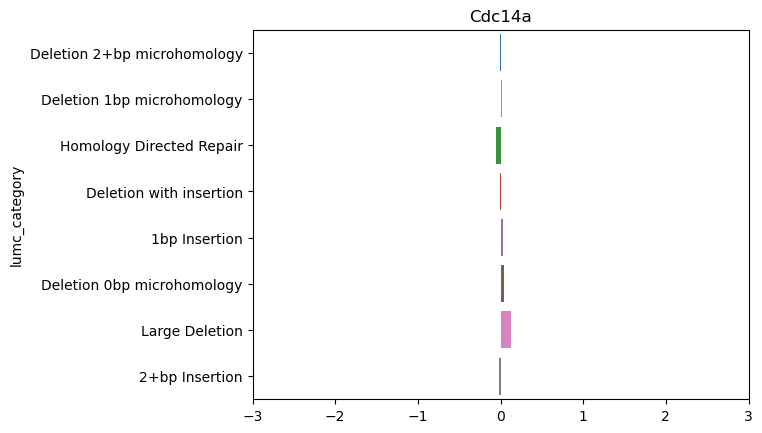

In [25]:
for gene in genes_to_investigate:
    # a = X_imputed["MB03"].loc[gene] 
    # b = X_imputed["MB04"].loc[gene] 

    sorting = X_imputed["MB03"].mean().argsort()[::-1]

    a = np.log2(X_imputed["MB03"].loc[gene]/calculate_geometric_mean(X_imputed["MB03"], psuedo_controls))[sorting]
    b = np.log2(X_imputed["MB04"].loc[gene]/calculate_geometric_mean(X_imputed["MB04"], psuedo_controls))[sorting]
    features = X_imputed["MB04"].columns.to_series()[sorting]

    mean_diff = ((a + b )/ 2)

    # mean_diff = np.exp2(mean_diff)

    # mean_diff = mean_diff / mean_diff.sum()

    sns.barplot(x = mean_diff, y= mean_diff.index)

    plt.title(gene)
    plt.xlim(-3, 3)
    # plt.xlim(0.0, 3)
    plt.show()